In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns
import scanpy as sc
plt.rcParams['font.family'] = 'Helvetica Neue'

In [3]:
#enrichment_df = pd.read_parquet('results/clustering_nde30ntotal75.parquet')
manual_annotation = pd.read_csv('results/clustering_nde30ntotal75_manual_annotated.csv')

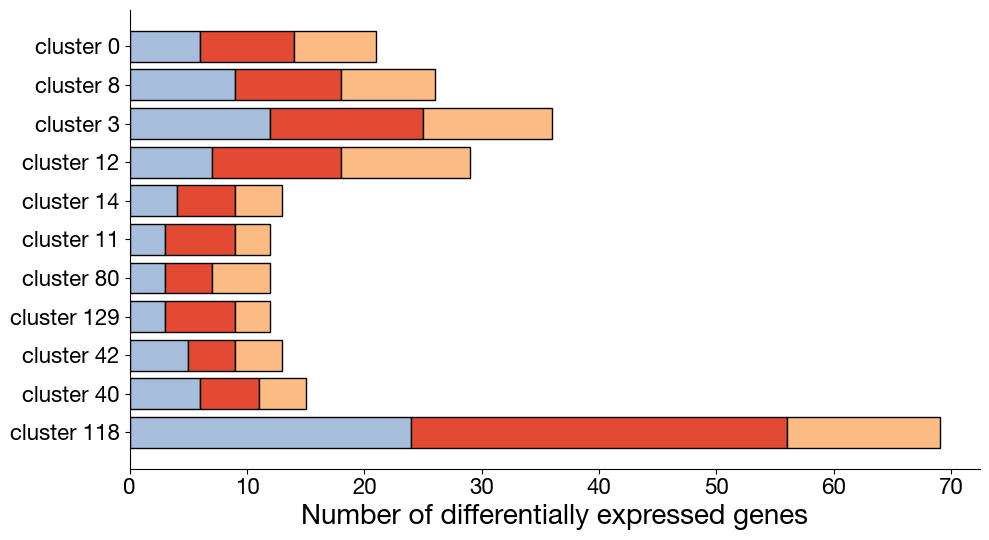

In [4]:
test = manual_annotation[['cluster', 'rest_count', 'stim8hr_count', 'stim48hr_count']].copy()
test['cluster'] = test['cluster'].astype(str).apply(lambda x: 'cluster ' + x)
test = test.set_index('cluster')
test = test.iloc[:11][::-1]

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 5.5))

ax.barh(test.index, test['rest_count'], 
        label='rest_count', color='#a6bddb', edgecolor='black')
ax.barh(test.index, test['stim8hr_count'], 
        left=test['rest_count'], label='stim8hr_count', 
        color='#e34a33', edgecolor='black')
ax.barh(test.index, test['stim48hr_count'], 
        left=test['rest_count'] + test['stim8hr_count'], 
        label='stim48hr_count', color='#fdbb84', edgecolor='black')

# Add a title and labels
ax.set_xlabel('Number of differentially expressed genes', fontsize=20)
ax.tick_params(labelsize=16)

sns.despine()

# Display the plot
plt.tight_layout()
plt.savefig('results/scenario1.png')
plt.show()

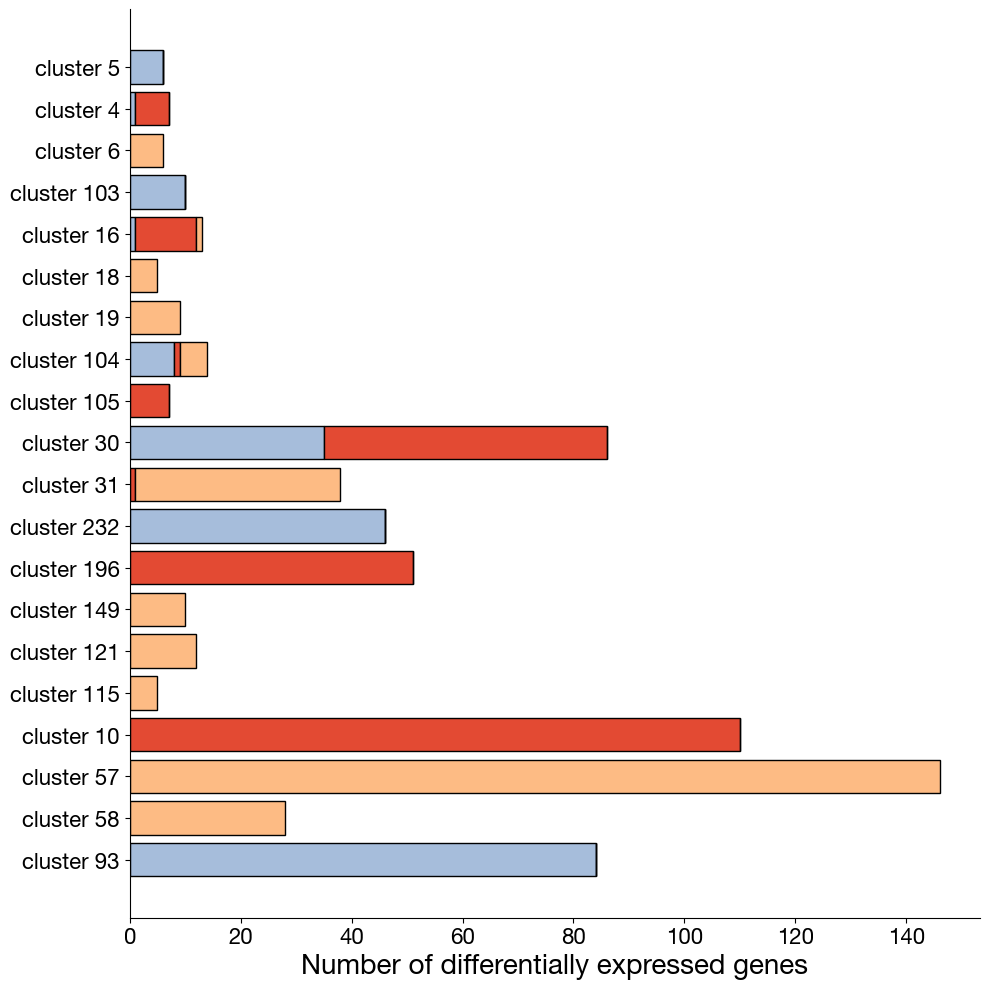

In [5]:
test = manual_annotation[['cluster', 'rest_count', 'stim8hr_count', 'stim48hr_count']].copy()
test['cluster'] = test['cluster'].astype(str).apply(lambda x: 'cluster ' + x)
test = test.set_index('cluster')
test = test.iloc[12:32][::-1]

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 10))

ax.barh(test.index, test['rest_count'], 
        label='rest_count', color='#a6bddb', edgecolor='black')
ax.barh(test.index, test['stim8hr_count'], 
        left=test['rest_count'], label='stim8hr_count', 
        color='#e34a33', edgecolor='black')
ax.barh(test.index, test['stim48hr_count'], 
        left=test['rest_count'] + test['stim8hr_count'], 
        label='stim48hr_count', color='#fdbb84', edgecolor='black')

# Add a title and labels
ax.set_xlabel('Number of differentially expressed genes', fontsize=20)
ax.tick_params(labelsize=16)

# Create custom legend patches to display the colors and hatches correctly
rest_patch = mpatches.Patch(facecolor='#4c72b0', hatch='/', label='rest_count')
stim8hr_patch = mpatches.Patch(facecolor='#55a868', hatch='o', label='stim8hr_count')
stim48hr_patch = mpatches.Patch(facecolor='#c44e52', hatch='x', label='stim48hr_count')

sns.despine()

# Display the plot
plt.tight_layout()
plt.savefig('results/scenario2.png')
plt.show()

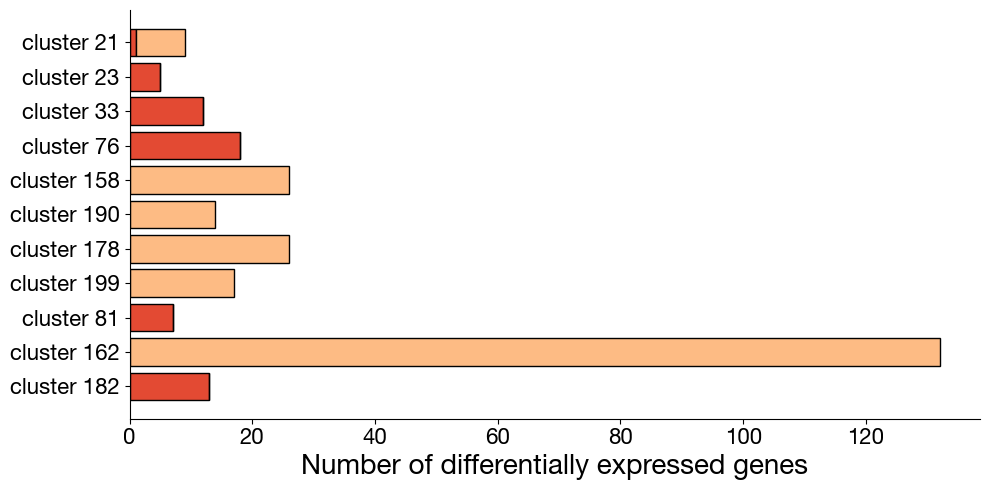

In [36]:
test = manual_annotation[['cluster', 'rest_count', 'stim8hr_count', 'stim48hr_count']].copy()
test['cluster'] = test['cluster'].astype(str).apply(lambda x: 'cluster ' + x)
test = test.set_index('cluster')
test = test.iloc[43:54][::-1]

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(test.index, test['rest_count'], 
        label='rest_count', color='#a6bddb', edgecolor='black')
ax.barh(test.index, test['stim8hr_count'], 
        left=test['rest_count'], label='stim8hr_count', 
        color='#e34a33', edgecolor='black')
ax.barh(test.index, test['stim48hr_count'], 
        left=test['rest_count'] + test['stim8hr_count'], 
        label='stim48hr_count', color='#fdbb84', edgecolor='black')

# Add a title and labels
ax.set_xlabel('Number of differentially expressed genes', fontsize=20)
ax.tick_params(labelsize=16)

# Create custom legend patches to display the colors and hatches correctly
rest_patch = mpatches.Patch(facecolor='#4c72b0', hatch='/', label='rest_count')
stim8hr_patch = mpatches.Patch(facecolor='#55a868', hatch='o', label='stim8hr_count')
stim48hr_patch = mpatches.Patch(facecolor='#c44e52', hatch='x', label='stim48hr_count')

sns.despine()

# Display the plot
plt.tight_layout()
plt.savefig('results/scenario3.png')
plt.show()

### Draw example correlation matrix

In [11]:
def corr_compute(gene_list):
    mask = adata.obs.target_contrast_gene_name.isin(genelist)
    rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
    stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
    stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
    list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
    list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
    ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
    list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
    list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
    ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
    list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
    list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
    ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
    
    data = np.concatenate([rest, stim8hr, stim48hr])
            
    test = pd.DataFrame(data=data,
                        index=ind,
                        columns=adata.var_names)
    test2 = test.T.corr()
    return test2

In [7]:
datadir = '/Users/rzhu/Gladstone Dropbox/Ronghui Zhu/GRNPerturbSeq/3_expts/processed_data/CD4i_final'
experiment_name = 'CD4i_final'
adata = sc.read_h5ad(datadir + f'/DE_results_all_confounders/{experiment_name}.merged_DE_results.h5ad')
adata.layers['zscore'] = adata.layers['log_fc'] / adata.layers['lfcSE']
adata.layers['zscore'][np.where(adata.layers['zscore'] > 50)] = 50
adata.var_names = adata.var.gene_name
adata.X = np.nan_to_num(adata.layers['zscore'], 0)

In [8]:
adata_final = sc.read_h5ad('../../../RZAnalysisCodes/results/nde30ntotal75_clustering.h5ad')

In [9]:
np.sort(adata_final.obs.hdbscan.unique())

array([  0,   3,   4,   5,   6,   8,  10,  11,  12,  14,  16,  18,  19,
        20,  21,  23,  27,  30,  31,  33,  35,  40,  41,  42,  49,  57,
        58,  63,  67,  71,  75,  76,  77,  78,  80,  81,  82,  83,  84,
        85,  88,  89,  91,  92,  93,  94,  95,  98, 102, 103, 104, 105,
       108, 110, 112, 114, 115, 116, 117, 118, 121, 124, 128, 129, 131,
       132, 134, 135, 143, 144, 149, 150, 151, 152, 156, 158, 161, 162,
       168, 178, 181, 182, 185, 190, 191, 192, 193, 194, 196, 197, 199,
       203, 204, 206, 207, 209, 210, 211, 213, 215, 216, 217, 218, 219,
       220, 221, 222, 225, 226, 227, 228, 229, 231, 232])

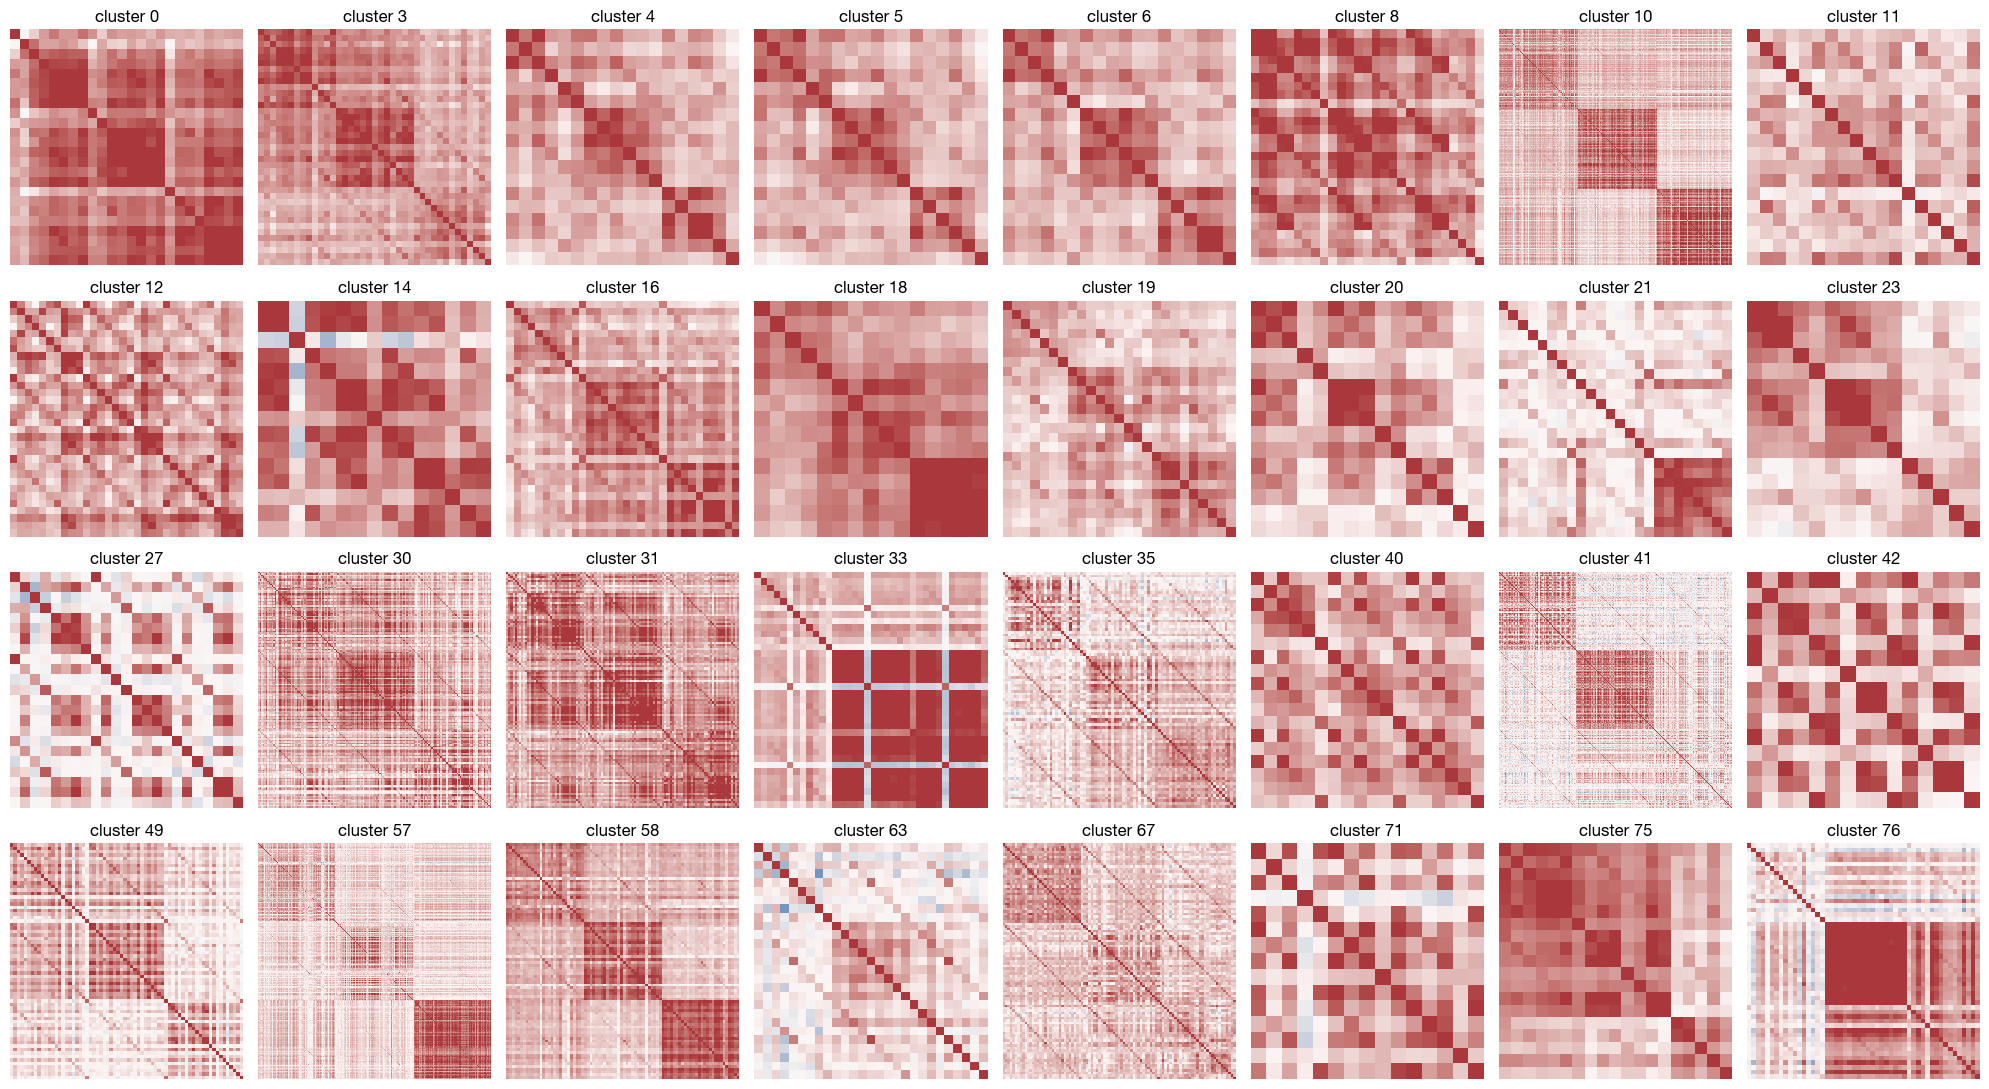

In [12]:
fig, axes = plt.subplots(4,8,figsize=(20,11))
ax = axes.flatten()
cluster_list = np.sort(adata_final.obs.hdbscan.unique())[:32]
for i in range(32):
    genelist = adata_final[adata_final.obs.hdbscan==cluster_list[i]].obs.target_contrast_gene_name.unique().tolist()
    corr_mtx = corr_compute(genelist)
    sns.heatmap(corr_mtx, vmin=-0.5, vmax=0.5, cmap='vlag', ax=ax[i], xticklabels=[], yticklabels=[], cbar=False)
    ax[i].set_title('cluster '+str(cluster_list[i]))
plt.tight_layout()

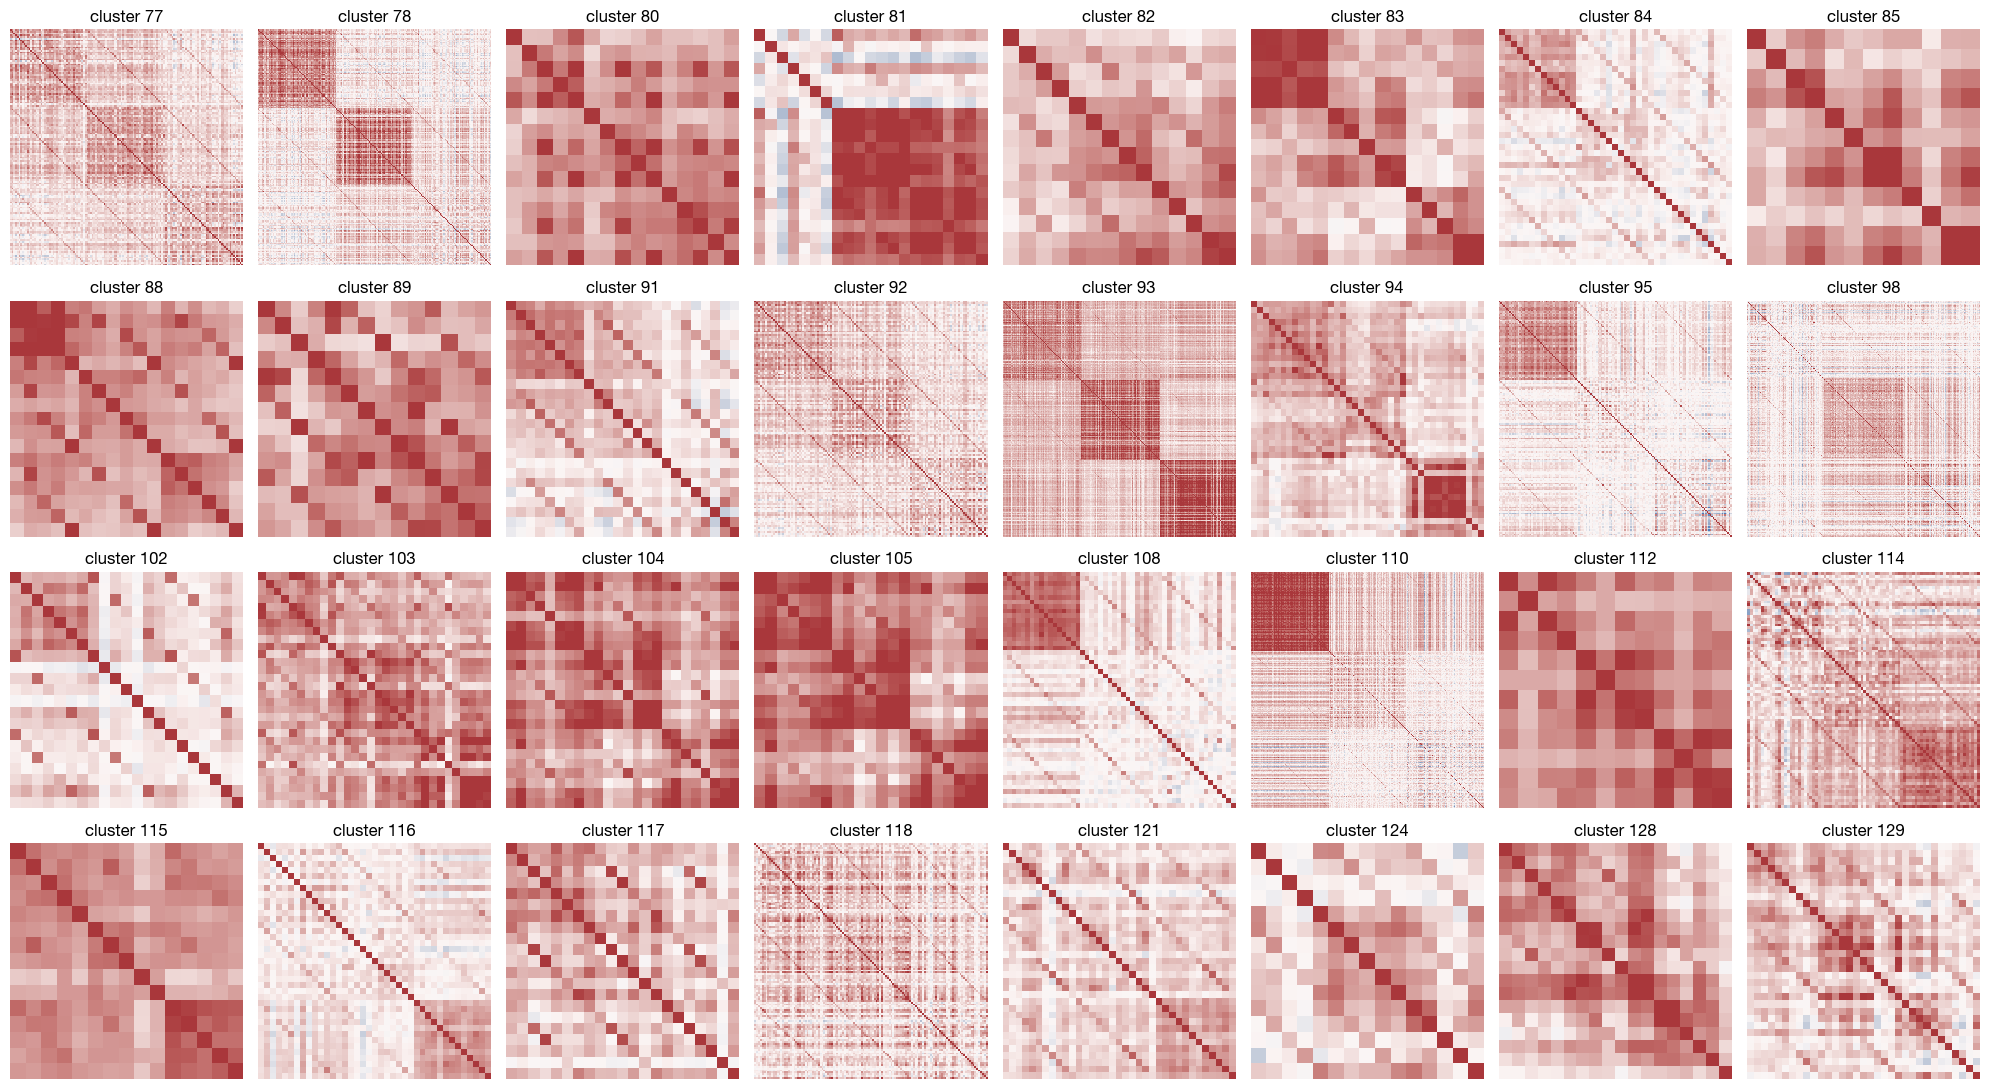

In [13]:
fig, axes = plt.subplots(4,8,figsize=(20,11))
ax = axes.flatten()
cluster_list = np.sort(adata_final.obs.hdbscan.unique())[32:64]
for i in range(32):
    genelist = adata_final[adata_final.obs.hdbscan==cluster_list[i]].obs.target_contrast_gene_name.unique().tolist()
    corr_mtx = corr_compute(genelist)
    sns.heatmap(corr_mtx, vmin=-0.5, vmax=0.5, cmap='vlag', ax=ax[i], xticklabels=[], yticklabels=[], cbar=False)
    ax[i].set_title('cluster '+str(cluster_list[i]))
plt.tight_layout()

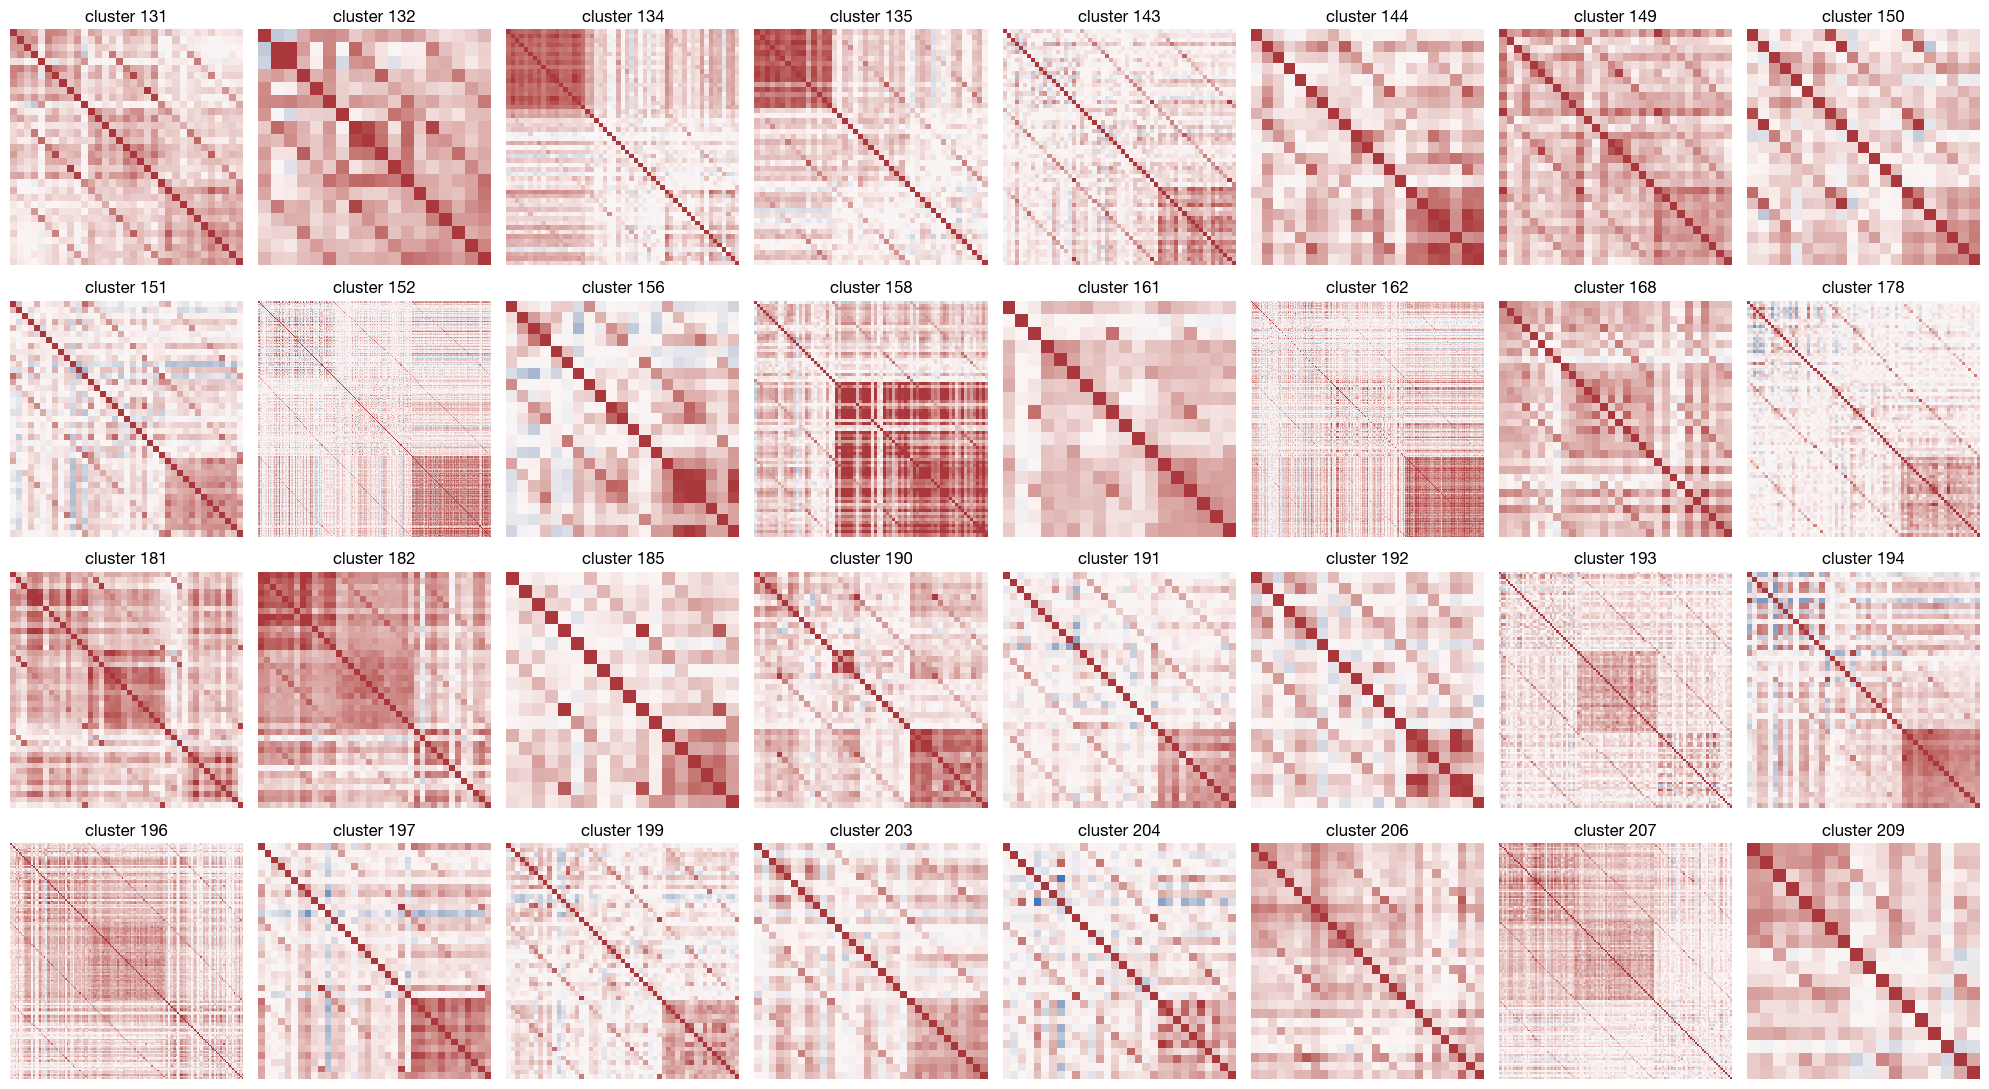

In [14]:
fig, axes = plt.subplots(4,8,figsize=(20,11))
ax = axes.flatten()
cluster_list = np.sort(adata_final.obs.hdbscan.unique())[64:96]
for i in range(32):
    genelist = adata_final[adata_final.obs.hdbscan==cluster_list[i]].obs.target_contrast_gene_name.unique().tolist()
    corr_mtx = corr_compute(genelist)
    sns.heatmap(corr_mtx, vmin=-0.5, vmax=0.5, cmap='vlag', ax=ax[i], xticklabels=[], yticklabels=[], cbar=False)
    ax[i].set_title('cluster '+str(cluster_list[i]))
plt.tight_layout()

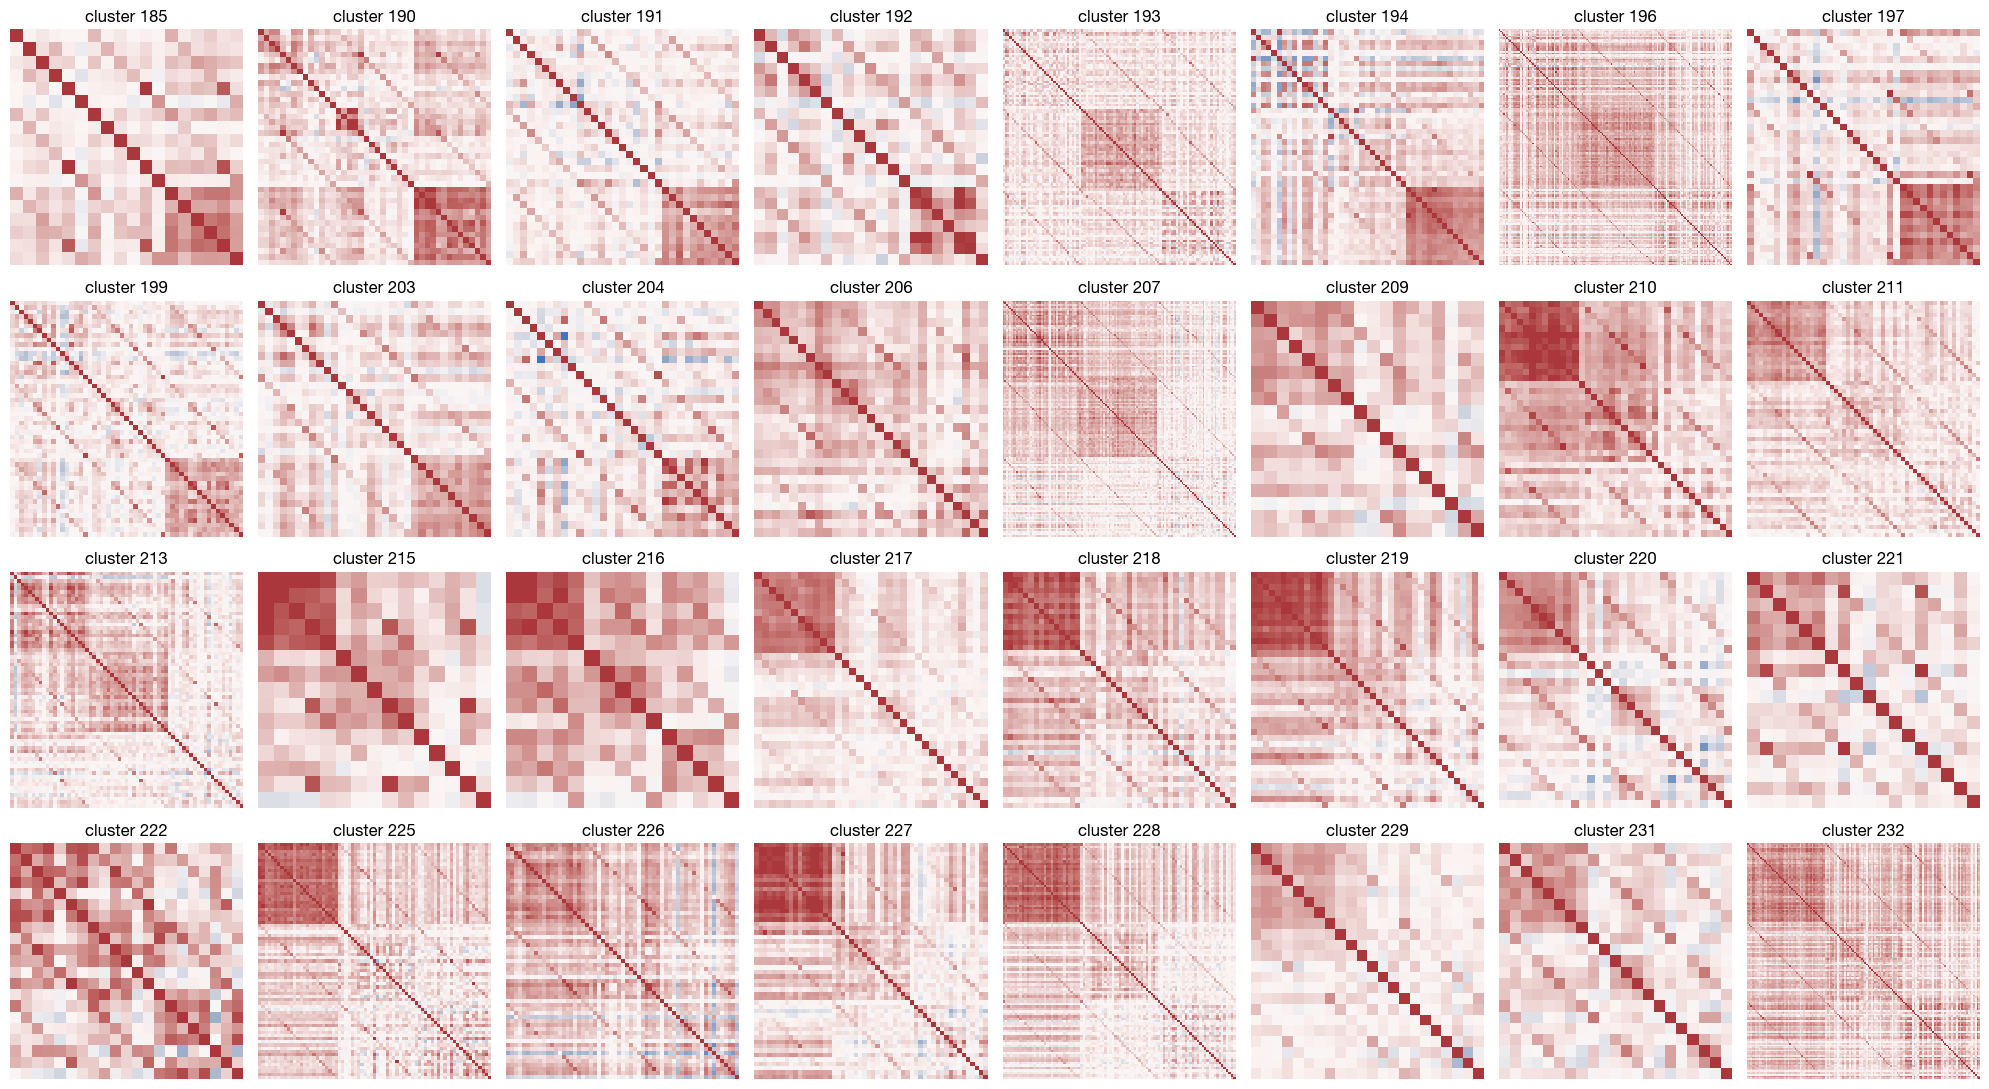

In [15]:
fig, axes = plt.subplots(4,8,figsize=(20,11))
ax = axes.flatten()
cluster_list = np.sort(adata_final.obs.hdbscan.unique())[82:]
for i in range(32):
    genelist = adata_final[adata_final.obs.hdbscan==cluster_list[i]].obs.target_contrast_gene_name.unique().tolist()
    corr_mtx = corr_compute(genelist)
    sns.heatmap(corr_mtx, vmin=-0.5, vmax=0.5, cmap='vlag', ax=ax[i], xticklabels=[], yticklabels=[], cbar=False)
    ax[i].set_title('cluster '+str(cluster_list[i]))
plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(4,8,figsize=(20,11))
ax = axes.flatten()
cluster_list = adata_final.obs.hdbscan.unique()[64:96]
for i in range(32):
    genelist = adata_final[adata_final.obs.hdbscan==cluster_list[i]].obs.target_contrast_gene_name.unique().tolist()
    corr_mtx = corr_compute(genelist)
    sns.heatmap(corr_mtx, vmin=-0.5, vmax=0.5, cmap='vlag', ax=ax[i], xticklabels=[], yticklabels=[], cbar=False)
    ax[i].set_title('cluster '+str(cluster_list[i]))
plt.tight_layout()

In [35]:
genelist = ['CASC3', 'SMG1', 'SMG7', 'SMG8', 'SMG9', 'UPF2']

In [37]:
genelist = ['MED12', 'MED13', 'MED19', 'TADA1', 'TADA2B', 'TAF5L', 'TAF6L', 'SUPT7L', 'SUPT20H', 'SGF29']

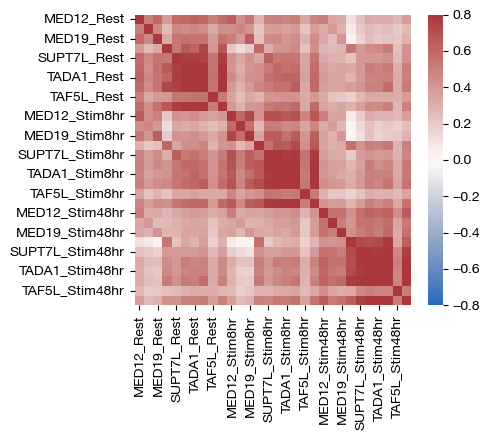

In [38]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(5, 4.5))
sns.heatmap(test2, vmin=-0.8, vmax=0.8, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [26]:
genelist = ['DPH1', 'DPH2', 'DPH5', 'DPH6', 'DNAJC24', 'TPT1']

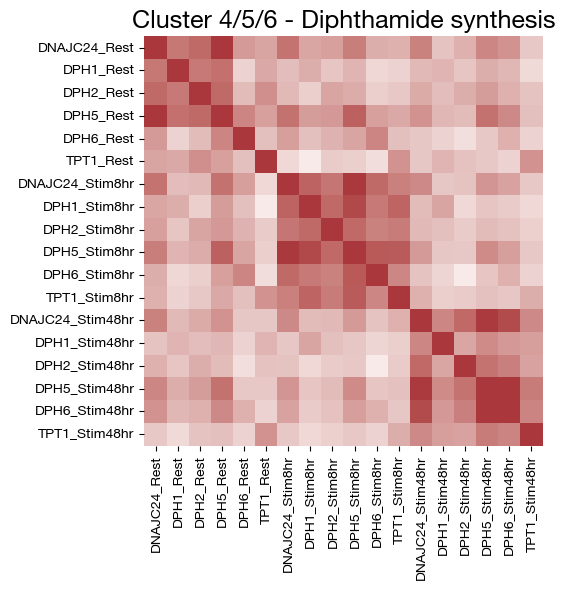

In [30]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(5.625, 6))
sns.heatmap(test2, vmin=-0.5, vmax=0.5, cmap='vlag', ax=ax, cbar=False)
ax.set_title('Cluster 4/5/6 - Diphthamide synthesis', fontsize=18)
plt.tight_layout()
plt.show()

In [38]:
genelist = ['LAT', 'PLCG1', 'ZAP70', 'LCP2', 'CD247', 'CD3E', 'CD3D', 'CD3G', 'VAV1']

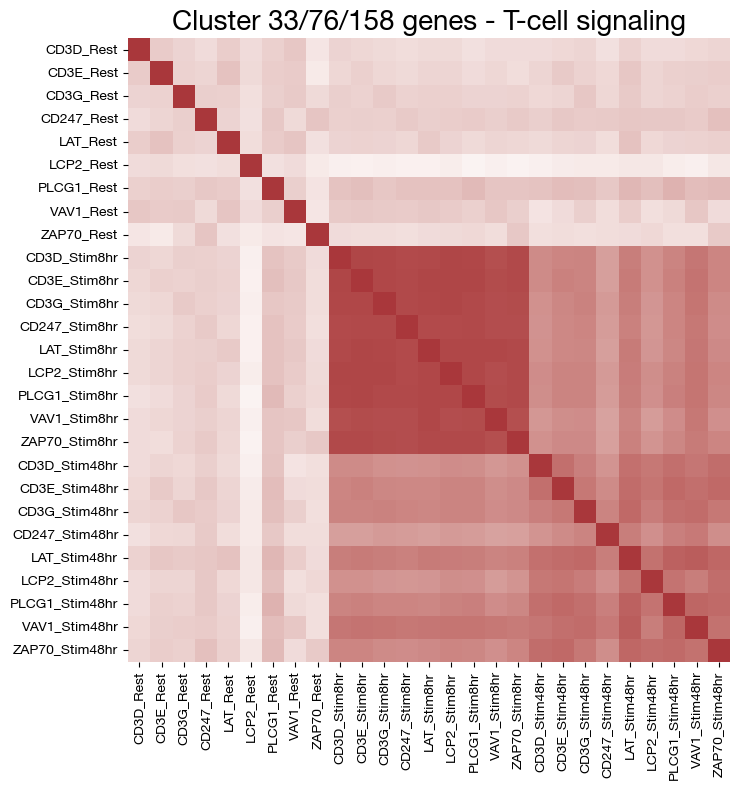

In [39]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(7.5, 8))
sns.heatmap(test2, vmin=-1, vmax=1, cmap='vlag', ax=ax, cbar=False)
ax.set_title('Cluster 33/76/158 genes - T-cell signaling', fontsize=20)
plt.tight_layout()
plt.show()

In [41]:
genelist = ['SLC25A1', 'PDHB', 'MDH2', 'DLAT', 'PDHA1', 'CS', 'ACLY', 'STYXL1']

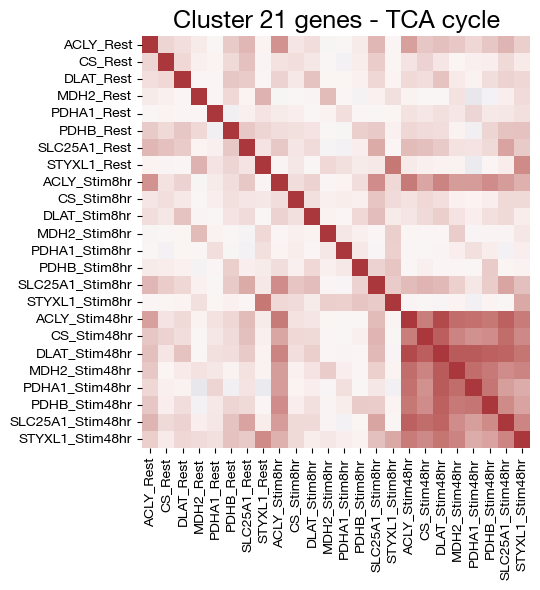

In [43]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(5.5, 6))
sns.heatmap(test2, vmin=-0.6, vmax=0.6, cmap='vlag', ax=ax, cbar=False)
ax.set_title('Cluster 21 genes - TCA cycle', fontsize=18)
plt.tight_layout()
plt.show()

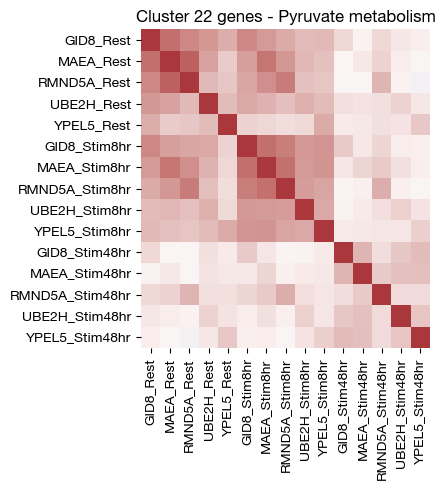

In [49]:
genelist = ['UBE2H', 'MAEA', 'YPEL5', 'RMND5A', 'GID8']
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(4.5, 5))
sns.heatmap(test2, vmin=-0.7, vmax=0.7, cmap='vlag', ax=ax, cbar=False)
ax.set_title('Cluster 22 genes - Pyruvate metabolism', fontsize=12)
plt.tight_layout()
plt.show()

In [17]:
genelist = ['URM1', 'MOCS3', 'ELP1', 'ELP2', 'ELP3', 'ELP4', 'ELP5', 'CTU1', 'CTU2', 'KTI12']

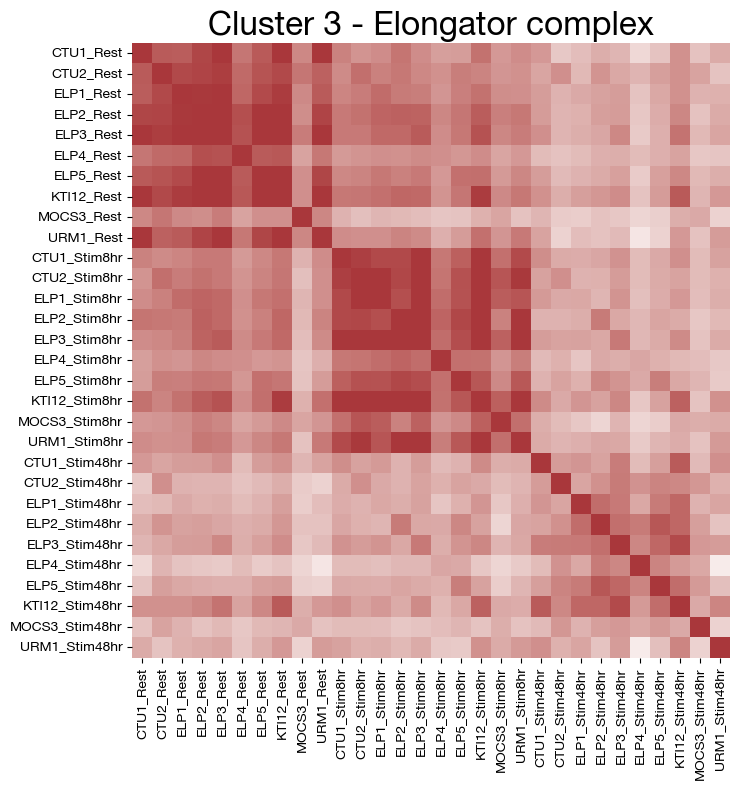

In [24]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(7.5, 8))
sns.heatmap(test2, vmin=-0.5, vmax=0.5, cmap='vlag', ax=ax, cbar=False)
ax.set_title('Cluster 3 - Elongator complex', fontsize=24)
plt.tight_layout()
plt.show()

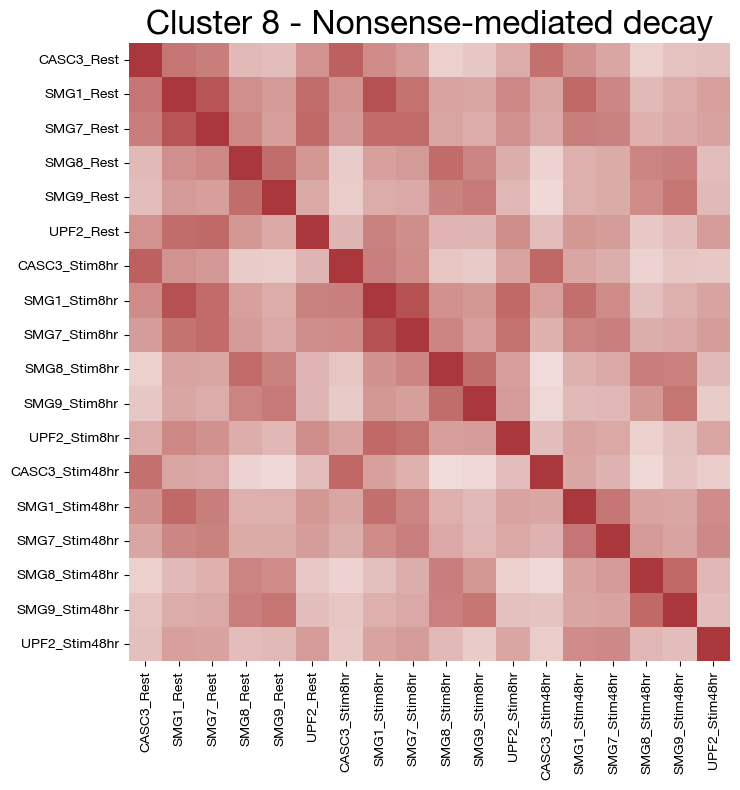

In [51]:
genelist = ['CASC3', 'SMG1', 'SMG7', 'SMG8', 'SMG9', 'UPF2']
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(7.5, 8))
sns.heatmap(test2, vmin=-0.8, vmax=0.8, cmap='vlag', ax=ax, cbar=False)
ax.set_title('Cluster 8 - Nonsense-mediated decay', fontsize=24)
plt.tight_layout()
plt.show()

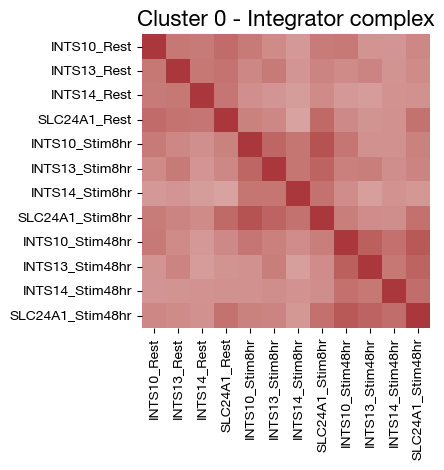

In [70]:
genelist = ['INTS10', 'INTS13', 'INTS14', 'SLC24A1']
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(4.5, 4.8))
sns.heatmap(test2, vmin=-0.8, vmax=0.8, cmap='vlag', ax=ax, cbar=False)
ax.set_title('Cluster 0 - Integrator complex', fontsize=16)
plt.tight_layout()
plt.show()

In [65]:
genelist = ['EMC7', 'EMC4', 'EMC3', 'MMGT1']

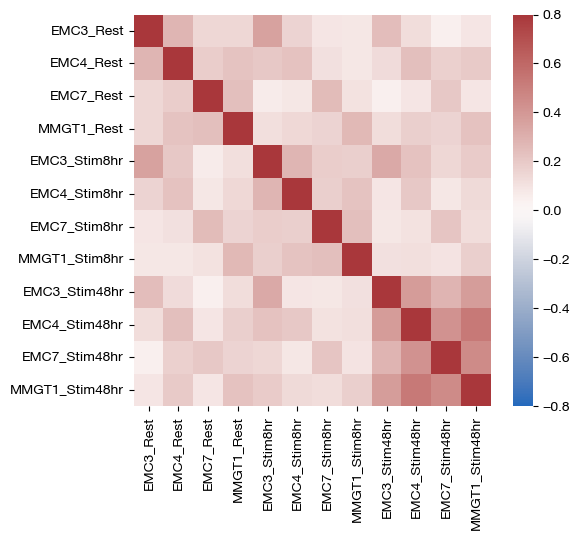

In [66]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(6, 5.5))
sns.heatmap(test2, vmin=-0.8, vmax=0.8, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [72]:
genelist = ['CD28', 'BCL10', 'HACD4', 'HELT', 'NDFIP2', 'CARMIL2', 'MALT1']

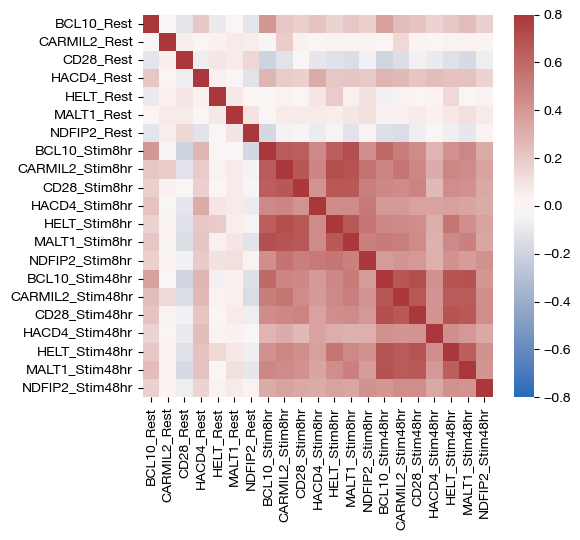

In [75]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(6, 5.5))
sns.heatmap(test2, vmin=-0.8, vmax=0.8, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [32]:
genelist = ['LAMTOR2', 'LAMTOR3', 'LAMTOR4', 'RRAGA', 'RRAGC', 'WDR24', 'WDR59', 'MIOS', 'RPTOR']

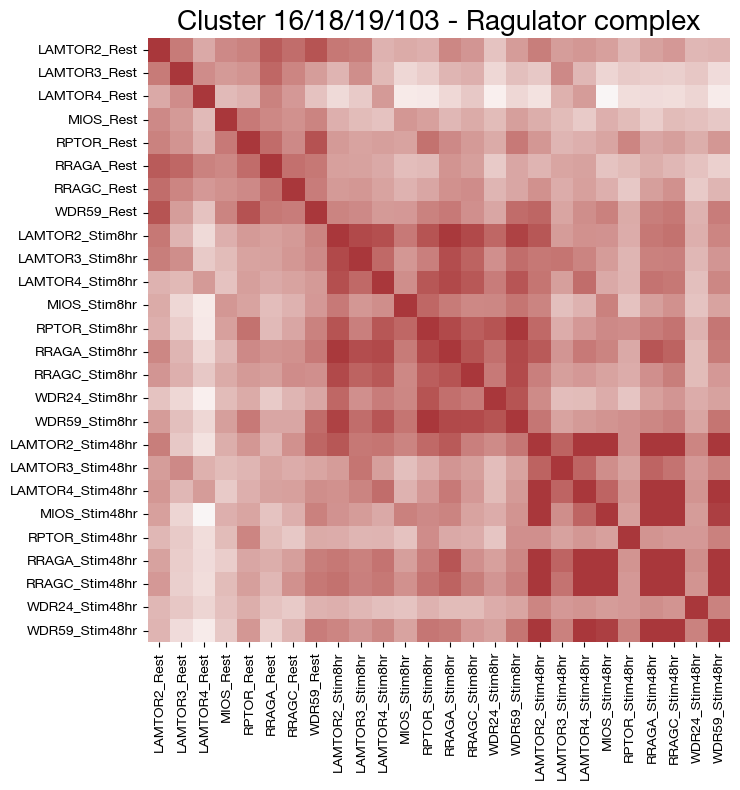

In [34]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(7.5, 8))
sns.heatmap(test2, vmin=-0.5, vmax=0.5, cmap='vlag', ax=ax, cbar=False)
ax.set_title('Cluster 16/18/19/103 - Ragulator complex', fontsize=20)
plt.tight_layout()
plt.show()

In [83]:
genelist = ['C11orf54', 'CEP89', 'GALNT6', 'GPS2', 'L2HGDH', 'PPM1D', 'VEZT']

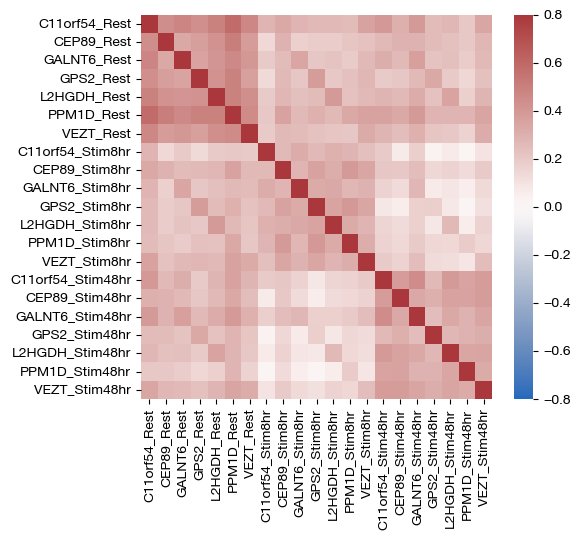

In [84]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(6, 5.5))
sns.heatmap(test2, vmin=-0.8, vmax=0.8, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [91]:
genelist = ['DDX1', 'METTL1', 'FAM98B', 'TRMT61A', 'RTRAF', 'ADAT3', 'ADAT2']

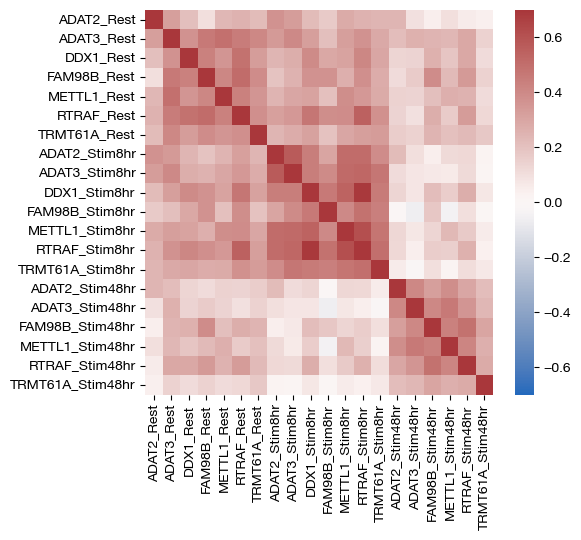

In [94]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(6, 5.5))
sns.heatmap(test2, vmin=-0.7, vmax=0.7, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [95]:
genelist = ['ITSN1', 'TP73', 'ZHX3', 'TMEM45B', 'IMMT', 'COL4A1', 'PCNX4', 'PTP4A1', 'OSR1', 'CUL4B', 'OAF', 'MLYCD', 'MSL2', 'FAM98C', 'B3GAT1', 'FITM1', 'CCND2', 'CASP9']

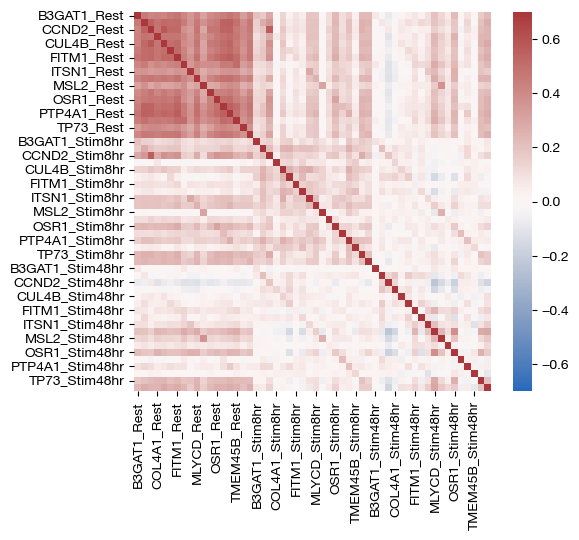

In [96]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(6, 5.5))
sns.heatmap(test2, vmin=-0.7, vmax=0.7, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [97]:
genelist = ['CHORDC1', 'DMRTC2', 'FAM98B', 'GANAB', 'UVRAG', 'CCDC22', 'PEX16', 'AK9', 'PATL1', 'BEX3', 'FBXO11', 'STAT3', 'PMVK', 'HPRT1', 'CREB3L2', 'SEC62', 'TIPARP', 'LCK', 'EIPR1', 'STAT5B', 'C19orf54', 'PGK1', 'NDST2', 'UBR4', 'WDR44']

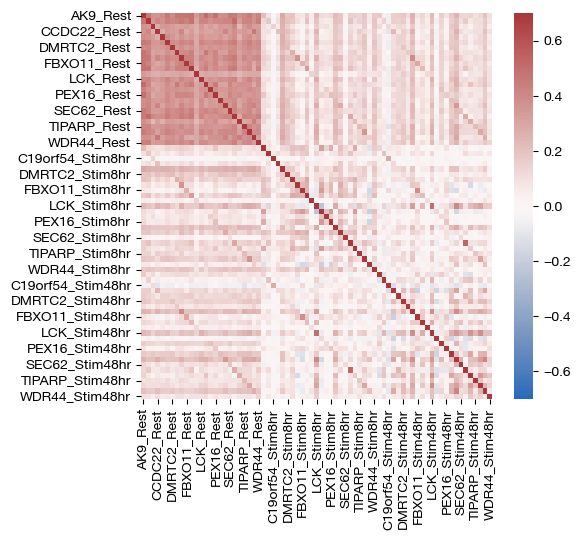

In [98]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(6, 5.5))
sns.heatmap(test2, vmin=-0.7, vmax=0.7, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [99]:
genelist = ['TNFRSF10B', 'GJC1', 'CCL5', 'MORC2', 'C11orf54', 'RPS6KB1', 'PUDP', 'TOP2B', 'COX20', 'IWS1', 'MOSPD1', 'ABHD14A', 'SLC25A22', 'NABP1', 'LMNA']

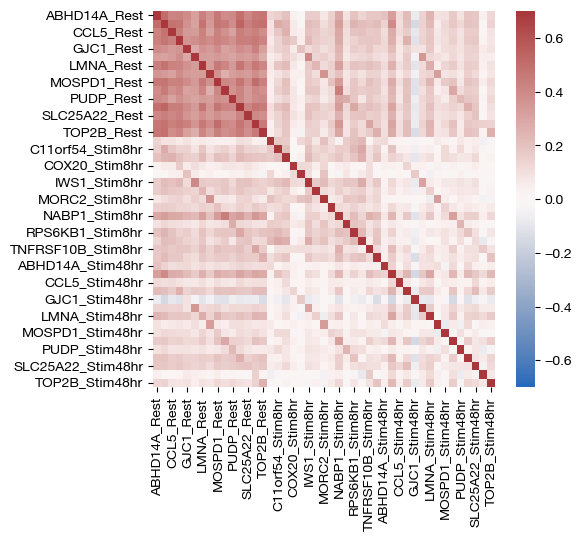

In [100]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(6, 5.5))
sns.heatmap(test2, vmin=-0.7, vmax=0.7, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [101]:
genelist = ['NCBP3', 'YEATS2', 'DNAJA3', 'FBXO3', 'DMRTA2', 'DBF4', 'SMARCA5', 'MED15', 'MOSMO', 'TNK1', 'PPM1D', 'OTUD1', 'LIG1']

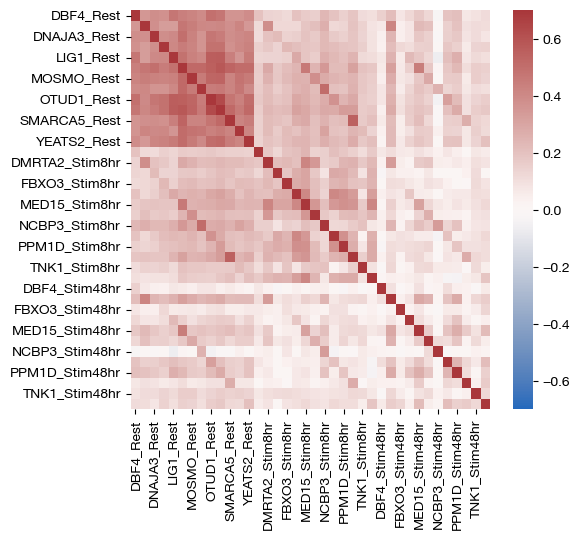

In [102]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(6, 5.5))
sns.heatmap(test2, vmin=-0.7, vmax=0.7, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [103]:
genelist = ['ST7L', 'SEC24A', 'CBFA2T2', 'SLC35D2', 'SLC35A2', 'RHOC', 'APOBEC3G', 'DNAJC4', 'SBF1', 'TBC1D14', 'TMEM245', 'AMER1', 'LENG8', 'PDK1', 'PIAS1', 'FAM3C', 'SRD5A3', 'ADCY4']

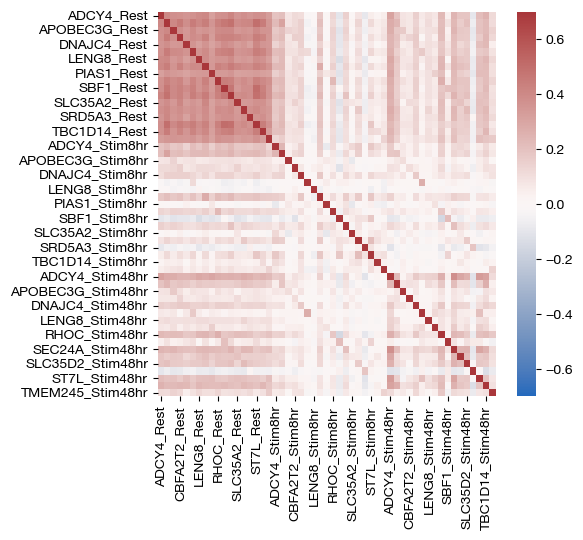

In [104]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(6, 5.5))
sns.heatmap(test2, vmin=-0.7, vmax=0.7, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [105]:
genelist = ['GNLY', 'CEP104', 'TNS1', 'PIGH', 'PTCH1', 'PRRT2', 'PBX2', 'SP100', 'ATXN1L', 'NMRAL1', 'TRIM39', 'UBL3', 'GZF1', 'ZNF165', 'CTSF']

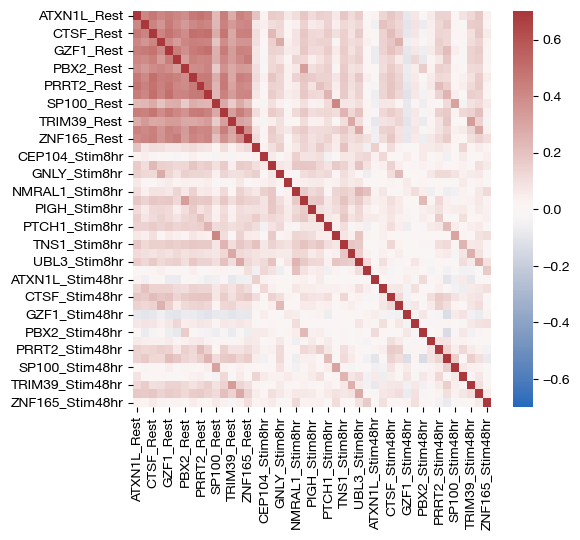

In [106]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(6, 5.5))
sns.heatmap(test2, vmin=-0.7, vmax=0.7, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()